# Statistical analysis of orthopedic features

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, poisson, norm, t, ttest_ind
from numpy.random import seed
from scipy import stats

### Import the clean data variables

In [3]:
df = pd.read_csv('Data/data.csv')     ## full dataframe with 6 features and 2 targest 
X = pd.read_csv('Data/X.csv')         ## X data - features
Y1 = pd.read_csv('Data/Y1.csv')       ## Y data - Target 'class'
Y2 = pd.read_csv('Data/Y2.csv')       ## Y data - Target 'category'
columns = X.columns                   ## list of features
                     
Tdata = np.c_[np.ones((X.shape[0], 1)), X]     ## Tensorflow variable

### Look at correlations

<AxesSubplot:>

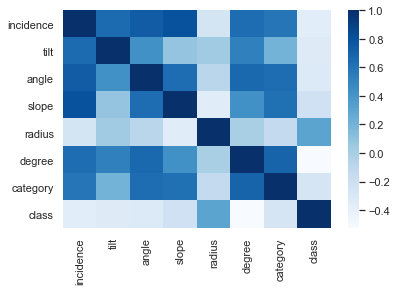

In [4]:
sns.set(rc={'figure.figsize':(6,4)})
sns.heatmap(df.corr(), cmap="Blues")

### The heatmap above shows a significant, possible too much, correlation between slope and intercept

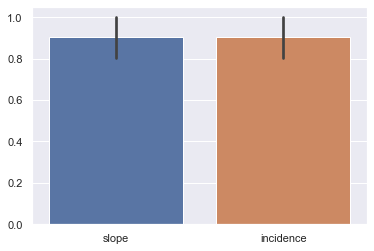

In [5]:
## Take a look at the correlation between slope and intercept
two = df[['slope','incidence']]
ax = sns.barplot(data=two.corr())

### Pretty close to 90%- lets run some code that simply removes any correlations > 90%

In [6]:
# Remove features that have >90% correlation with each other
corr = X.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
data = X[selected_columns]

### All features passed so compare Feature correlations for the Class classification, then Category

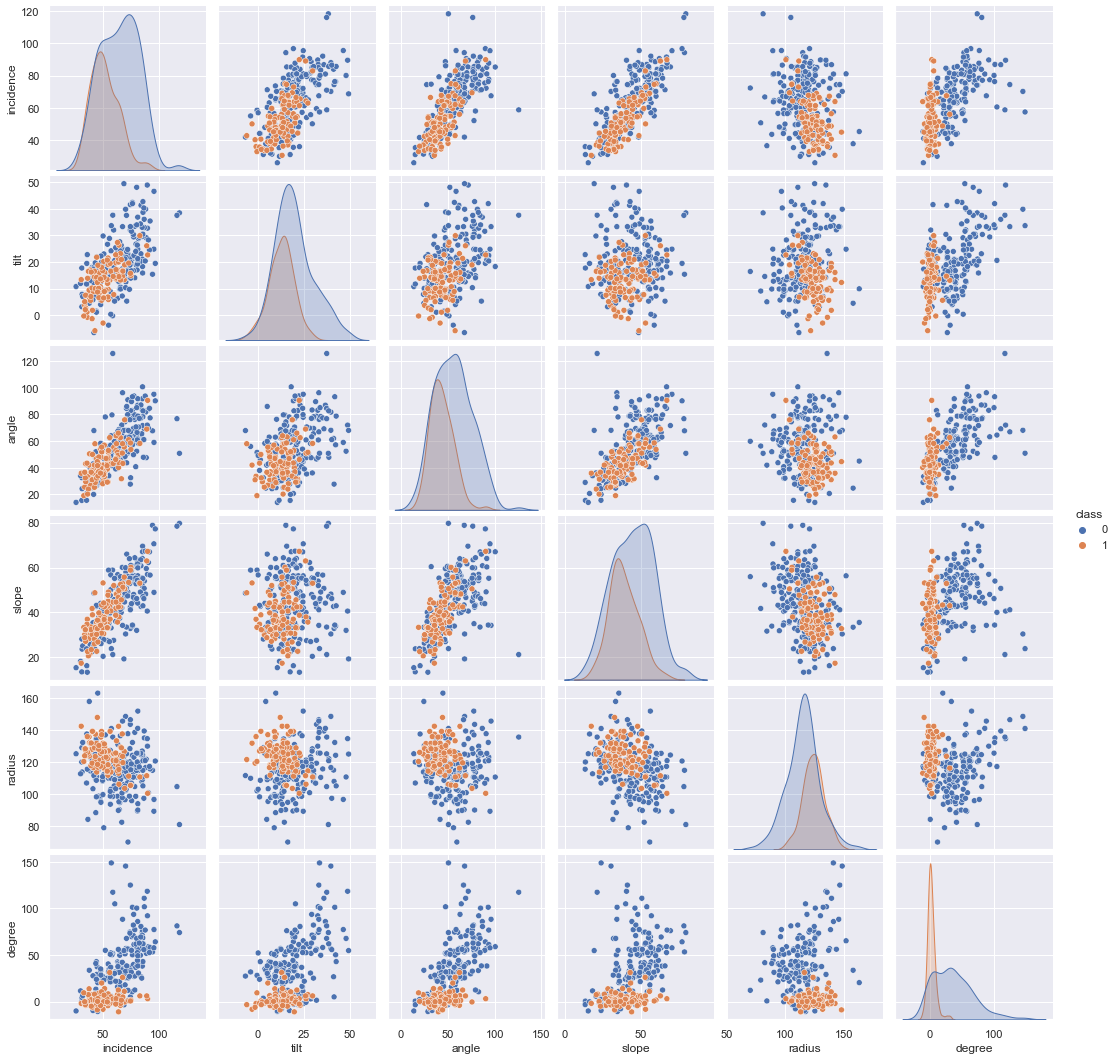

In [7]:
# Correlation for "Class" only

plot_class = df.drop(['category'], axis=1)
sns.pairplot(plot_class, hue="class")
plt.show()

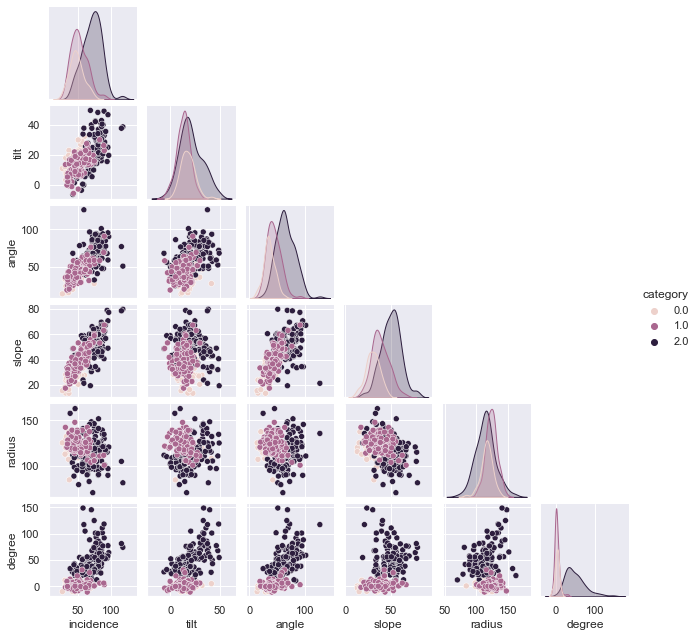

In [8]:
# Correlation for "Category" only

plot_category = df.drop(['class'], axis=1).astype(float)
sns.pairplot(plot_category, hue="category", height=1.5, corner=True)
plt.show()

In [9]:
# Correlation for "Category" only
yes = df[['degree', 'class']]
sns.distplot(data =  df['degree'],  kind = 'ecdf')

TypeError: distplot() got an unexpected keyword argument 'data'

### Below, histograms of each Features data distribution. Note: normal-ish distributions.  

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
num = 0
for column in X:
    num+=1
    plt.subplot(3,3, num)
    plt.hist(X[column], bins=30, alpha=0.9, label=column)
#    plt.xlim(0,10)
#    plt.ylim(-2,22)
    
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
    
    plt.title(column, loc='left', fontsize=14, fontweight=0, color=palette(num))

plt.suptitle("Data Distribution of Each Feature", fontsize=25, fontweight=0, color='black', style='italic', y=1.02)

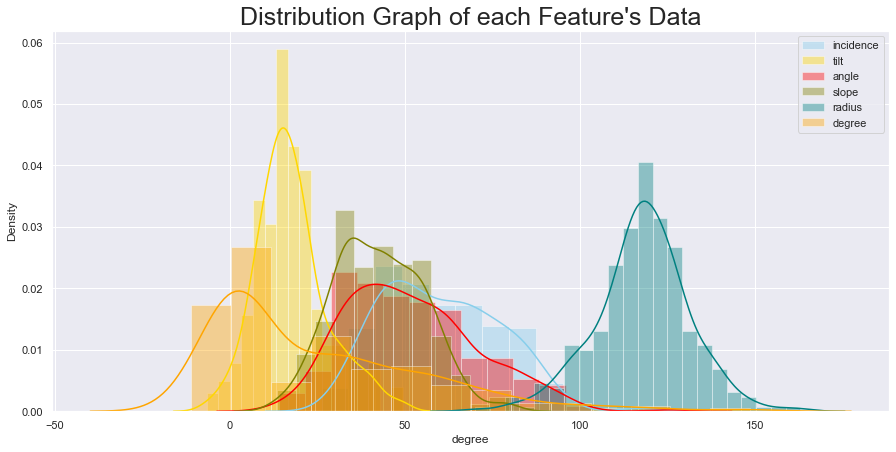

In [17]:
# ignore all future warnings
import warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

sns.distplot( df['incidence'], color='skyblue', label='incidence')
sns.distplot( df['tilt'], color='gold', label='tilt')
sns.distplot( df['angle'], color='red', label='angle')
sns.distplot( df['slope'], color='olive', label='slope')
sns.distplot( df['radius'], color='teal', label='radius')
sns.distplot( df['degree'], color='orange', label='degree')
plt.title("Distribution Graph of each Feature's Data", fontsize=25)
plt.legend()
plt.show()

### Split the data into Abnormal/Normal  and plot Data Distribution, CDF's

In [10]:
norma =df[df['class'] == 0]
abn = df[df['class'] == 1]
norma = norma.drop(['category', 'class'],axis=1)
abn = abn.drop(['category', 'class'],axis=1)

In [11]:
norm_degree =df[df['class'] == 0]['degree']
abn_degree = df[df['class'] == 1]['degree']

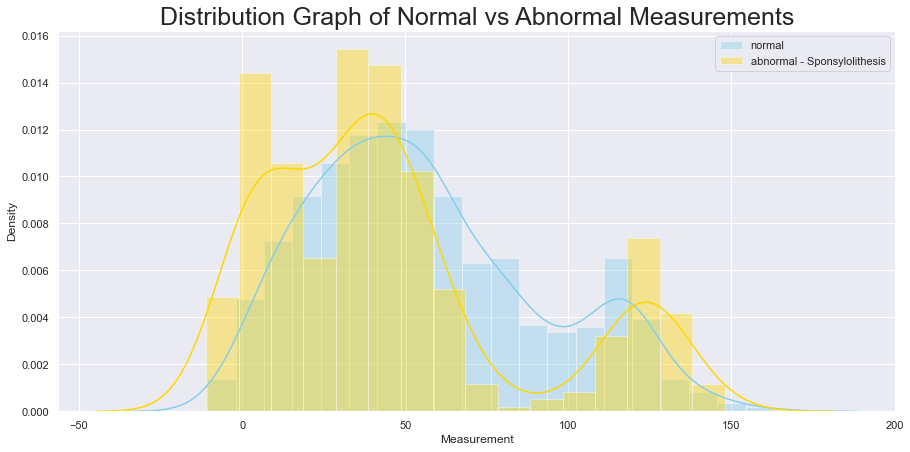

In [16]:
# ignore all future warnings
import warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
sns.set(rc={'figure.figsize':(15,7)})
sns.distplot( norma, color='skyblue', label='normal')
sns.distplot( abn, color='gold', label='abnormal - Sponsylolithesis')
plt.title("Distribution Graph of Normal vs Abnormal Measurements", fontsize=25)
plt.xlabel("Measurement")
plt.legend()
plt.show()

In [19]:
norm_degree =df[df['category'] == 0]['degree']
h_degree = df[df['category'] == 1]['degree']
s_degree = df[df['category'] == 2]['degree']

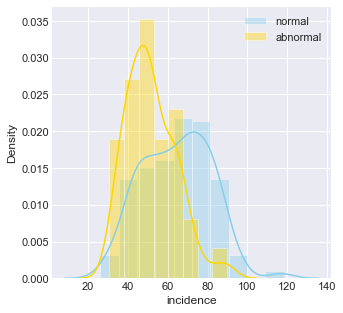

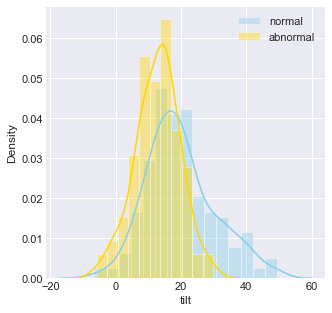

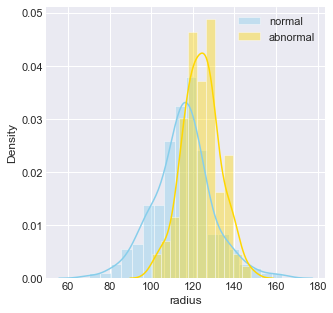

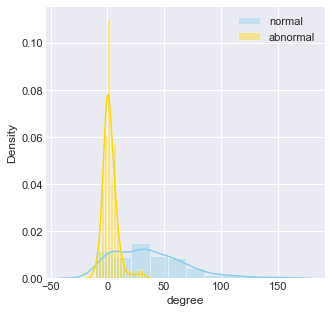

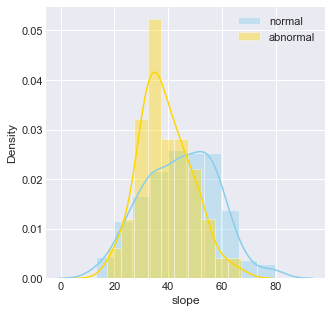

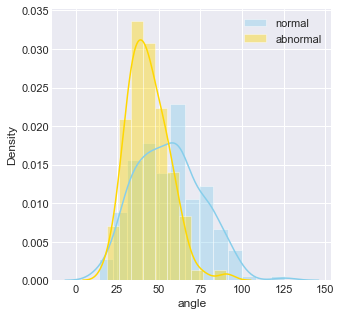

In [18]:
# ignore all future warnings
import warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

columns = ['incidence', 'tilt','radius','degree','slope', 'angle']
for column in df[columns]:
    norma =df[df['class'] == 0][column]
    abn = df[df['class'] == 1][column]

    sns.set(rc={'figure.figsize':(5,5)})
    plt.style.use('seaborn-darkgrid')
    palette = plt.get_cmap('Set1')
    sns.distplot( norma, color='skyblue', label='normal')
    sns.distplot( abn, color='gold', label='abnormal')
    plt.legend()
    plt.show()

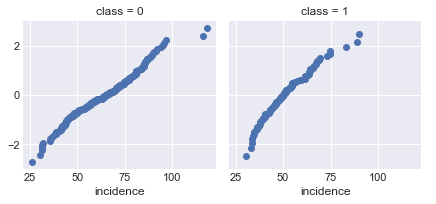

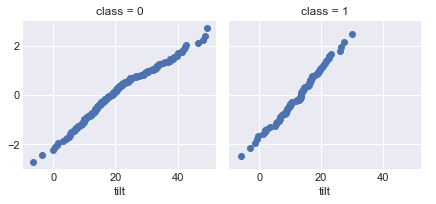

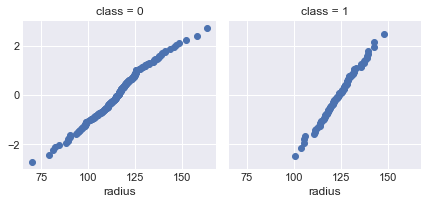

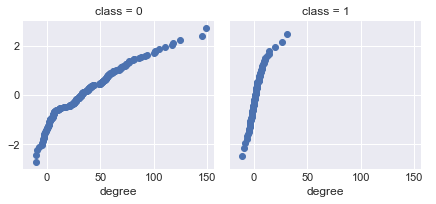

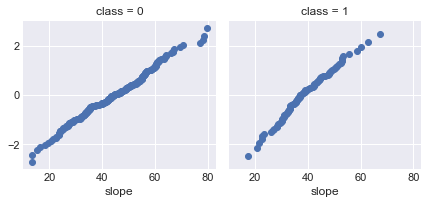

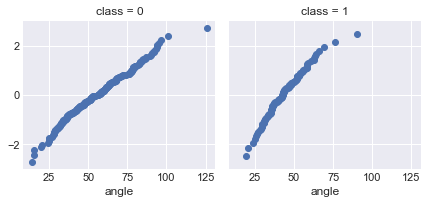

In [126]:
columns = ['incidence', 'tilt','radius','degree','slope', 'angle']
for column in columns:
    x = df[[column, 'class']]

    def quantile_plot(x, **kwargs):
        quantiles, xr = stats.probplot(x, fit=False)
        plt.scatter(xr, quantiles, **kwargs)

    g = sns.FacetGrid(x, col="class", height=3)
    g.map(quantile_plot, column)
    g.add_legend()

### The CDF's above show the 2 best features are probably 'degree' and 'radius'.  For limited features the best selections to begin with and test against would be degree and radius.  Incidence would be my 3rd selection.

In [40]:
from scipy.stats import kendalltau, pearsonr, spearmanr
def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]
def pearsonr_corr(x,y):
    return pearsonr(x,y)[0]

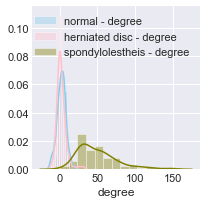

In [128]:
sns.distplot( norm_degree, color='skyblue', label='normal - degree')
sns.distplot( h_degree, color='pink', label='herniated disc - degree')
sns.distplot( s_degree, color='olive', label='spondylolestheis - degree')
plt.legend()
plt.show()

In [42]:
norm_radius =df[df['class'] == 0]['radius']
abn_radius = df[df['class'] == 1]['radius']

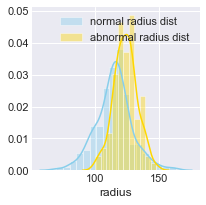

In [129]:
norm_radius =df[df['class'] == 0]['radius']
abn_radius = df[df['class'] == 1]['radius']
sns.distplot( norm_radius, color='skyblue', label='normal radius dist')
sns.distplot( abn_radius, color='gold', label='abnormal radius dist')
plt.legend()
plt.show()

In [45]:
  # Calculate ecdf
def ecdf(data):
    n = len(data)
    x = np.sort(data)           # x-data for the ECDF: x
    y = np.arange(1, n+1) / n   # y-data for the ECDF: y
    return x, y

In [46]:
def plot_ecdf(a, b):
    x, y = ecdf(a)
    t, u = ecdf(b)
    p = np.array([2.5, 97.5])
    ptiles = np.percentile(a, p)
        # Plot the CDF with axis labels
    _ = plt.plot(x, y, marker='.', color = 'blue', linestyle='none')
    _ = plt.plot(t, u, marker='.', color = 'brown',linestyle='none')
    _ = plt.xlabel('Blue is normal, Brown is abnormal')
    _ = plt.ylabel('25%, 95% Red Triangle')
    _ = plt.plot(ptiles, p/100,marker='D',color='red', linestyle='none')
        # Show the plot
    plt.show()

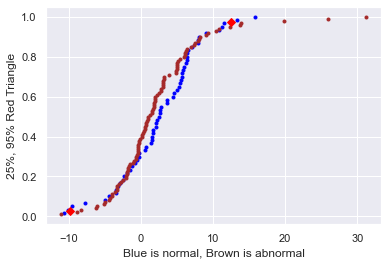

In [47]:
plot_ecdf(norm_degree, abn_degree)

### Statistical Significance

### Confidence Interval

In [127]:
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
data = norm_degree

In [147]:
n = len(data)
m = np.mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n-1)


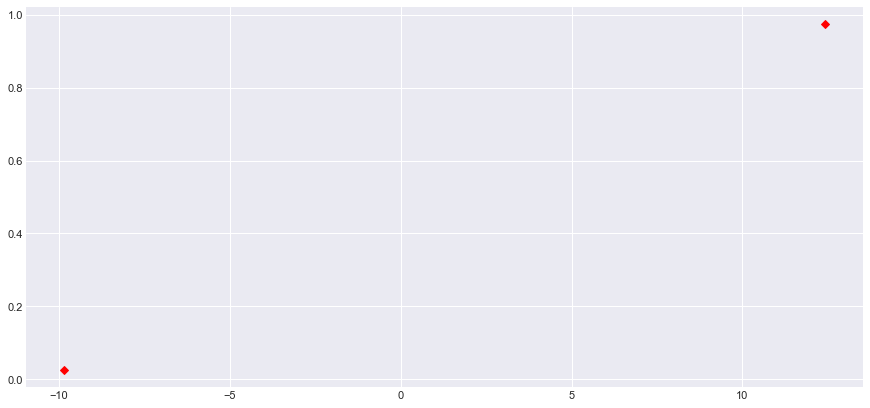

In [153]:
_ = plt.plot(ptiles, p/100,marker='D',color='red', linestyle='none')

In [129]:
start = m - h
print(start)

1.0513960944871676


In [130]:
end = m + h
print(end)

3.9091050899794997


In [136]:
x = stats.norm.ppf(0.95, loc=0,scale=1)
y = 2*(1 - stats.norm.cdf(2.1))

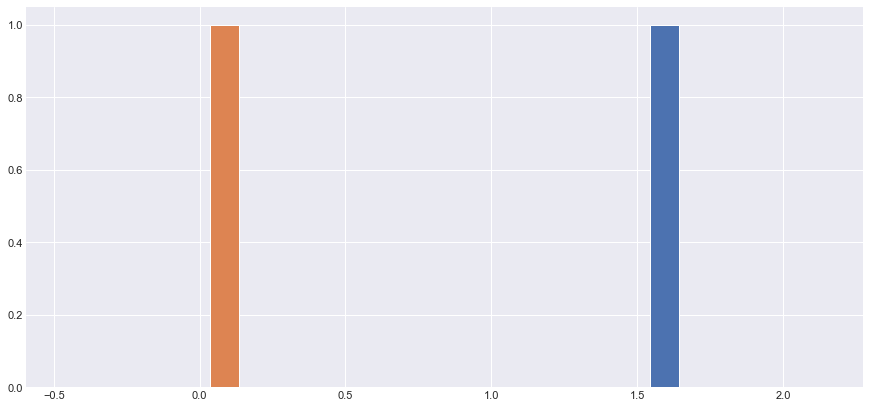

In [137]:
_ = plt.hist(x, bins=10)
_ = plt.hist(y, bins=10)

In [109]:
print("Normal mean: ")
print(np.mean(norm_degree))
print("Abnormal Mean: ")
print(np.mean(abn_degree))

Normal mean: 
2.4802505922333338
Abnormal Mean: 
2.1865720613099997


In [110]:
print("Normal STD: ")
print(np.std(norm_degree,ddof=1))
print("Abnomal STD: ")
print(np.std(abn_degree,ddof=1))

Normal STD: 
5.531176870671138
Abnomal STD: 
6.3074827982537265


In [111]:
from scipy.stats import norm

In [112]:
tm = np.mean(norm_degree)
tstd= norm_degree.std(ddof=1)
norm(tm, tstd).ppf([0.025, 0.975])

array([-8.36065687, 13.32115805])

In [ ]:
from scipy.stats import t

In [115]:
critical = t(len(norm_degree)).ppf([0.025, 0.975])
critical * tstd / np.sqrt(len(norm_degree)) + tm

array([1.0518942 , 3.90860698])

In [116]:
help(t)

Help on t_gen in module scipy.stats._continuous_distns object:

class t_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  t_gen(momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  A Student's t continuous random variable.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `t` is:
 |  
 |  .. math::
 |  
 |      f(x, \nu) = \frac{\Gamma((\nu+1)/2)}
 |                      {\sqrt{\pi \nu} \Gamma(\nu/2)}
 |                  (1+x^2/\nu)^{-(\nu+1)/2}
 |  
 |  where :math:`x` is a real number and the degrees of freedom parameter
 |  :math:`\nu` (denoted ``df`` in the implementation) satisfies
 |  :math:`\nu > 0`. :math:`\Gamma` is the gamma function
 |  (`scipy.special.gamma`).
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      t_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_

In [ ]:
from scipy.stats import ttest_ind
insured = medical.charges.loc[medical.insuranceclaim == 1]
uninsured = medical.charges.loc[medical.insuranceclaim == 0]
ttest_ind(insured,uninsured)

In [ ]:
     #Specify unequal variances in the ttest_ind
ttest_ind(insured,uninsured, equal_var = False)

In [26]:
columns = ['incidence','angle','slope','degree','tilt','radius']
def test(y, var):
    for column in columns:
        a, b = stats.ttest_ind(y,X[column], equal_var = var)
        print("The p-value for ",column,":  ",np.mean(b))
        print("The ttest for ",column,": ",abs(np.mean(a)))

In [27]:
print("P-values for the Class target vs all Features: ",test(Y1,False))

The p-value for  incidence :   1.4546759956331843e-177
The ttest for  incidence :  62.68383584637901
The p-value for  angle :   4.098548220478672e-147
The ttest for  angle :  48.81258366571051
The p-value for  slope :   1.2978731917764568e-169
The ttest for  slope :  58.720588604294996
The p-value for  degree :   3.688655294450916e-36
The ttest for  degree :  14.361169539397462
The p-value for  tilt :   1.95195811457888e-94
The ttest for  tilt :  30.254165106875544
The p-value for  radius :   6.375984197796973e-295
The ttest for  radius :  155.06841431696327
P-values for the Class target vs all Features:  None


In [28]:
print("P-values for the Category target vs all Features: ",test(Y2,False))

The p-value for  incidence :   9.147843746516067e-176
The ttest for  incidence :  61.63447569242954
The p-value for  angle :   5.333967073148655e-145
The ttest for  angle :  47.87458935784543
The p-value for  slope :   4.014317390845837e-167
The ttest for  slope :  57.31734578275095
The p-value for  degree :   4.658786404222277e-34
The ttest for  degree :  13.797692000849402
The p-value for  tilt :   7.7193919961656e-89
The ttest for  tilt :  28.509338822770104
The p-value for  radius :   1.2082641747608714e-294
The ttest for  radius :  153.63482752664683
P-values for the Category target vs all Features:  None


In [29]:
print("P-values for the Radius target vs all Features: ",test(X[['radius']],False))

The p-value for  incidence :   4.585775729676822e-202
The ttest for  incidence :  47.27610403029368
The p-value for  angle :   2.5626475768336805e-211
The ttest for  angle :  50.74360349864518
The p-value for  slope :   1.9665876707156713e-301
The ttest for  slope :  71.92205188974408
The p-value for  degree :   5.858462871485352e-178
The ttest for  degree :  49.43881353547932
The p-value for  tilt :   0.0
The ttest for  tilt :  105.86697118915589
The p-value for  radius :   1.0
The ttest for  radius :  0.0
P-values for the Radius target vs all Features:  None


In [30]:
print("P-values for the Tilt target vs all Features: ",test(X[['tilt']],False))

The p-value for  incidence :   2.0567136676661206e-151
The ttest for  incidence :  38.37254564258045
The p-value for  angle :   2.769929364605397e-105
The ttest for  angle :  28.62271016307982
The p-value for  slope :   1.1843221868627964e-106
The ttest for  slope :  27.344513908306777
The p-value for  degree :   4.771155769398115e-05
The ttest for  degree :  4.11463730476948
The p-value for  tilt :   1.0
The ttest for  tilt :  0.0
The p-value for  radius :   0.0
The ttest for  radius :  105.86697118915589
P-values for the Tilt target vs all Features:  None


In [31]:
print("P-values for the Slope target vs all Features: ",test(X[['slope']],False))

The p-value for  incidence :   1.2836950497963163e-41
The ttest for  incidence :  14.674243126747355
The p-value for  angle :   1.7337990532928204e-12
The ttest for  angle :  7.222382237431311
The p-value for  slope :   1.0
The ttest for  slope :  0.0
The p-value for  degree :   2.0909117429984466e-19
The ttest for  degree :  9.475730957690342
The p-value for  tilt :   1.1843221868627964e-106
The ttest for  tilt :  27.344513908306777
The p-value for  radius :   1.9665876707156713e-301
The ttest for  radius :  71.92205188974408
P-values for the Slope target vs all Features:  None


In [32]:
print("P-values for the Degree target vs all Features: ",test(X[['degree']],False))

The p-value for  incidence :   2.3358777602086048e-55
The ttest for  incidence :  17.910934723601436
The p-value for  angle :   5.159656663523279e-35
The ttest for  angle :  13.331752242270788
The p-value for  slope :   2.0909117429984466e-19
The ttest for  slope :  9.475730957690342
The p-value for  degree :   1.0
The ttest for  degree :  0.0
The p-value for  tilt :   4.771155769398115e-05
The ttest for  tilt :  4.11463730476948
The p-value for  radius :   5.858462871485352e-178
The ttest for  radius :  49.43881353547932
P-values for the Degree target vs all Features:  None


In [33]:
print("P-values for the Incidence target vs all Features: ",test(X[['incidence']],False))

The p-value for  incidence :   1.0
The ttest for  incidence :  0.0
The p-value for  angle :   8.289127898850462e-09
The ttest for  angle :  5.844256195986753
The p-value for  slope :   1.2836950497963163e-41
The ttest for  slope :  14.674243126747355
The p-value for  degree :   2.3358777602086048e-55
The ttest for  degree :  17.910934723601436
The p-value for  tilt :   2.0567136676661206e-151
The ttest for  tilt :  38.37254564258045
The p-value for  radius :   4.585775729676822e-202
The ttest for  radius :  47.27610403029368
P-values for the Incidence target vs all Features:  None


In [34]:
print("P-values for the Angle target vs all Features: ",test(X[['angle']],False))

The p-value for  incidence :   8.289127898850462e-09
The ttest for  incidence :  5.844256195986753
The p-value for  angle :   1.0
The ttest for  angle :  0.0
The p-value for  slope :   1.7337990532928204e-12
The ttest for  slope :  7.222382237431311
The p-value for  degree :   5.159656663523279e-35
The ttest for  degree :  13.331752242270788
The p-value for  tilt :   2.769929364605397e-105
The ttest for  tilt :  28.62271016307982
The p-value for  radius :   2.5626475768336805e-211
The ttest for  radius :  50.74360349864518
P-values for the Angle target vs all Features:  None


### MACHINE LEARNING

#### Note: tilt and slope are equally correlated, excluding either does not appear to impact score.

In [328]:
# Report lists many scores to be used during parameter tuning
def report_scores(data_Y, predicted):
    print("accuracy",metrics.accuracy_score(data_Y, predicted))
    print("f1 score macro",metrics.f1_score(data_Y, predicted, average='macro')) 
    print("f1 score micro",metrics.f1_score(data_Y, predicted, average='micro')) 
    print("precision score",metrics.precision_score(data_Y, predicted, average='macro')) 
    print("recall score",metrics.recall_score(data_Y, predicted, average='macro')) 
    print("hamming_loss",metrics.hamming_loss(data_Y, predicted))
    print("classification_report", metrics.classification_report(data_Y, predicted))
    print("jaccard_similarity_score", metrics.jaccard_score(data_Y, predicted))
    print("log_loss", metrics.log_loss(data_Y, predicted))
    print("zero_one_loss", metrics.zero_one_loss(data_Y, predicted))
    print("AUC&ROC",metrics.roc_auc_score(data_Y, predicted))
    print("matthews_corrcoef", metrics.matthews_corrcoef(data_Y, predicted))

### Logistic Regression

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Split the data into a training and test set.
xtrain, xtest, ytrain, ytest = train_test_split(df[['degree', 'incidence', 'angle', 'radius', 'tilt', 'slope']].values, 
                                              (df[['class']] == "Abnormal").values,random_state=5)

ytrain = np.ravel(ytrain) # optimize the shape of y

clf = LogisticRegression(solver='lbfgs')
clf.fit(xtrain, ytrain)


# Print the accuracy from the testing data.
print("Initial accuracy score for Logistic Regression: ", accuracy_score(clf.predict(xtest), ytest))

Initial accuracy score for Logistic Regression:  0.8717948717948718


In [43]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#### Performing a KFold split of 5 results in same accuracy

In [44]:
def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 6
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [45]:
clf = LogisticRegression(solver='lbfgs')
score = cv_score(clf, xtrain, ytrain)
print(score)
print("Initial accuracy score for Logistic Regression: ", accuracy_score(clf.predict(xtest), ytest))

0.8488529014844803
Initial accuracy score for Logistic Regression:  0.8717948717948718


#### Performing a GridSearch to optimize the C parameter...

In [46]:
from sklearn.model_selection import GridSearchCV
def cv_optimize(clf, parameters, xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

In [47]:
parameters = {"C": [0.0001, 0.001, 0.1, 0.5, 1, 10]}
print(cv_optimize(clf, parameters, xtrain, ytrain, n_folds=5))

BEST PARAMS {'C': 0.1}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [167]:
# Run LogisticRegression with optimized C parameter
clfl2=LogisticRegression(solver='lbfgs',C=0.1)
ytest = np.ravel(ytest)
clfl2.fit(xtest, ytest)
ypred2=clfl2.predict(xtest)
accuracy_score(ypred2, ytest)
report_scores(data_Y, ypred2)

accuracy 0.8717948717948718
f1 score macro 0.8627726952850105
f1 score micro 0.8717948717948718
precision score 0.8685714285714285
recall score 0.8583333333333334
hamming_loss 0.1282051282051282
classification_report               precision    recall  f1-score   support

       False       0.86      0.80      0.83        30
        True       0.88      0.92      0.90        48

    accuracy                           0.87        78
   macro avg       0.87      0.86      0.86        78
weighted avg       0.87      0.87      0.87        78

jaccard_similarity_score 0.8148148148148148
log_loss 4.428109763252411
zero_one_loss 0.1282051282051282
AUC&ROC 0.8583333333333333
matthews_corrcoef 0.7268326590665243


### Gaussian Naive Bayes

In [113]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain,ytrain)
y_model = model.predict(xtest)
print("Accuracy for Gaussian Naive Bayes: ", accuracy_score(y_model, ytest))

Accuracy for Gaussian Naive Bayes:  0.7564102564102564


In [114]:
from sklearn.preprocessing import StandardScaler
ss_xtest = StandardScaler().fit_transform(xtest)
ss_xtrain = StandardScaler().fit_transform(xtrain)

### KNeighborsClassifier

#### After turning n_neighbors to 10, accuracy results are the same as Logistic Regression

In [204]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(xtrain,ytrain)
y_pred = knn.predict(xtest)
print("Accuracy for K Nearest Neighbors: ", accuracy_score(ytest, y_pred))

Accuracy for K Nearest Neighbors:  0.8717948717948718


In [227]:
model = KNeighborsClassifier()
model.fit(xtrain,ytrain)
KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='euclidean', metric_params=None, n_jobs=1, n_neighbors=10, p=1, weights='uniform')

kn_pred = model.predict(xtest)

In [228]:
report_scores(data_Y, kn_pred)

accuracy 0.8076923076923077
f1 score macro 0.7955617683033374
f1 score micro 0.8076923076923077
precision score 0.7976776917663617
recall score 0.79375
hamming_loss 0.19230769230769232
classification_report               precision    recall  f1-score   support

       False       0.76      0.73      0.75        30
        True       0.84      0.85      0.85        48

    accuracy                           0.81        78
   macro avg       0.80      0.79      0.80        78
weighted avg       0.81      0.81      0.81        78

jaccard_similarity_score 0.7321428571428571
log_loss 6.642154393629512
zero_one_loss 0.1923076923076923
AUC&ROC 0.7937500000000001
matthews_corrcoef 0.5914146496540943


In [265]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=5, random_state=1)
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)
print(metrics.accuracy_score(ytest, rfc.predict(xtest)))


0.8333333333333334


In [271]:
def randomforest(xtrain, ytrain, xtest, scores):
    rfc = RandomForestClassifier(n_estimators=10)
    rfc.fit(xtrain, ytrain)
    ypred = rfc.predict(xtest)
    scores.append(metrics.accuracy_score(ytest, rfc.predict(xtest)))

In [272]:
trials = range(1,100)
accuracyscores = []
for i in trials:
    randomforest(xtrain, ytrain, xtest, accuracyscores)
 #   accuracyscores.append(scores)

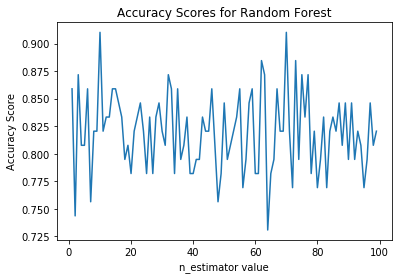

In [276]:
plt.plot(range(1,100),accuracyscores)
plt.xlabel('n_estimator value')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Random Forest')
plt.show()

In [283]:
rfc = RandomForestClassifier(n_estimators=12)
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)
print(metrics.accuracy_score(ytest, rfc.predict(xtest)))

0.9358974358974359


In [331]:
report_scores(ytest, ypred)

accuracy 0.9358974358974359
f1 score macro 0.9308878256246678
f1 score micro 0.9358974358974359
precision score 0.9422657952069716
recall score 0.9229166666666666
hamming_loss 0.0641025641025641
classification_report               precision    recall  f1-score   support

       False       0.96      0.87      0.91        30
        True       0.92      0.98      0.95        48

    accuracy                           0.94        78
   macro avg       0.94      0.92      0.93        78
weighted avg       0.94      0.94      0.94        78

jaccard_similarity_score 0.9038461538461539
log_loss 2.214065132875311
zero_one_loss 0.0641025641025641
AUC&ROC 0.9229166666666666
matthews_corrcoef 0.8649660707556456
